In [1]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats # Will use it to exclude outliers

In [2]:
# Open the zip file
with zipfile.ZipFile('/Users/isc/Downloads/dataset.zip') as z:
    # Open the csv file inside the zip file
    with z.open('dataset.csv') as f:
         # Load the contents of the csv file into a DataFrame
        df = pd.read_csv(f, low_memory=False)
# Display the first 5 rows of the data
df.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [3]:
# Get the shape of the dataframe
df.shape

(1083397, 42)

In [4]:
# Get the column names of the dataframe
df.columns

Index(['restaurant_link', 'restaurant_name', 'original_location', 'country',
       'region', 'province', 'city', 'address', 'latitude', 'longitude',
       'claimed', 'awards', 'popularity_detailed', 'popularity_generic',
       'top_tags', 'price_level', 'price_range', 'meals', 'cuisines',
       'special_diets', 'features', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'original_open_hours', 'open_days_per_week',
       'open_hours_per_week', 'working_shifts_per_week', 'avg_rating',
       'total_reviews_count', 'default_language',
       'reviews_count_in_default_language', 'excellent', 'very_good',
       'average', 'poor', 'terrible', 'food', 'service', 'value', 'atmosphere',
       'keywords'],
      dtype='object')

In [5]:
# Get the data types of the dataframe, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

# Data Cleaning

In [6]:
# Set the maximum number of columns to display
pd.options.display.max_columns = 42

# Get summary statistics of the dataframe
df.describe(include = "all")

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
count,1083397,1083397,1083397,1083397,1033074,742765,682712,1083397,1.067607e+06,1.067607e+06,1081555,263133,988409,985605,972763,806192,304327,635347,914294,340256,317407,1083397,1083397,1083397,593832,593832.000000,593832.000000,593832.000000,986761.000000,1.031162e+06,988204,988204.000000,988204.000000,988204.000000,988204.000000,988204.000000,988204.000000,599325.000000,604287.000000,602692.000000,261785.000000,99198
unique,1083397,840914,65997,24,250,1333,43495,1034685,NaN,NaN,2,917,981409,981940,39962,3,7298,745,97741,68,56453,2,2,2,237890,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99001
top,g10001637-d10002227,Subway,"[""Europe"", ""United Kingdom (UK)"", ""England"", ""...",Italy,Lombardy,Province of Barcelona,Paris,Greece,NaN,NaN,Unclaimed,"Travellers' Choice, Certificate of Excellence ...",#7616 of 8661 Restaurants in Barcelona,#1 of 1 places to eat in Agios Ioannis,"Mid-range, French",€€-€€€,€10-€30,"Lunch, Dinner",Italian,Vegetarian Friendly,Reservations,N,N,N,"{""Mon"": [""00:00-23:59""], ""Tue"": [""00:00-23:59""...",NaN,NaN,NaN,NaN,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"steak, onion loaf, lettuce wedge, chateaubrian..."
freq,1,4881,22942,224763,33097,18952,18129,92,NaN,NaN,607159,20868,119,6,20211,537918,5937,196123,53243,156652,36514,759380,946800,959900,7674,NaN,NaN,NaN,NaN,NaN,689754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.656718e+01,5.838040e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.327081,62.023282,7.630754,4.035943,1.028890e+02,NaN,44.563415,24.653440,10.490516,4.109302,2.355306,2.954850,4.104179,4.067245,3.982897,3.933682,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.882611e+00,8.639410e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.966734,30.538134,2.550128,0.713694,2.672415e+02,NaN,148.728179,89.850801,35.512256,15.669631,9.352756,11.030069,0.564208,0.581267,0.577605,0.555262,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.764031e+01,-7.121809e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,1.000000,0.000000e+00,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190986e+01,-8.027315e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,39.000000,6.000000,3.500000,6.000000e+00,NaN,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,3.500000,3.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.658510e+01,5.646530e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,58.500000,7.000000,4.000000,2.400000e+01,NaN,7.000000,3.000000,2.000000,1.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.140537e+01,1.223767e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,81.500000,7.000000,4.500000,9.300000e+01,NaN,26.000000,13.000000,6.000000,2.000000,1.000000,2.000000,4.500000,4.500000,4.500000,4.500000,NaN


#### Mixed Data Types Columns are 17: 
['region',
 'province',
 'city',
 'claimed',
 'awards',
 'popularity_detailed',
 'popularity_generic',
 'top_tags',
 'price_level',
 'price_range',
 'meals',
 'cuisines',
 'special_diets',
 'features',
 'original_open_hours',
 'default_language',
 'keywords']

In [7]:
# Create a list of the columns with object data type
object_columns = df.select_dtypes(include='object').columns

In [8]:
# For each column, count the number of rows per data type.

# Create an empty dataframe to hold the results
result_df = pd.DataFrame(columns=['column_name', 'data_type', 'count'])

# Loop through the columns
for column in object_columns:
    # Get the value counts of the data types
    value_counts = df[column].apply(type).value_counts()
    
    # Loop through the value counts
    for data_type, count in value_counts.items():
        # Add a row to the result dataframe
        result_df = result_df.append({'column_name': column, 'data_type': data_type, 'count': count}, ignore_index=True)

C:\Users\isc\AppData\Local\Temp\ipykernel_15872\3756869119.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'column_name': column, 'data_type': data_type, 'count': count}, ignore_index=True)
C:\Users\isc\AppData\Local\Temp\ipykernel_15872\3756869119.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'column_name': column, 'data_type': data_type, 'count': count}, ignore_index=True)
C:\Users\isc\AppData\Local\Temp\ipykernel_15872\3756869119.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'column_name': column, 'data_type': data_type, 'count': count}, ignore_index=True)
C:\Users\isc\AppData\Local\Temp\ipykernel_15872\3756869119

C:\Users\isc\AppData\Local\Temp\ipykernel_15872\3756869119.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'column_name': column, 'data_type': data_type, 'count': count}, ignore_index=True)
C:\Users\isc\AppData\Local\Temp\ipykernel_15872\3756869119.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'column_name': column, 'data_type': data_type, 'count': count}, ignore_index=True)
C:\Users\isc\AppData\Local\Temp\ipykernel_15872\3756869119.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'column_name': column, 'data_type': data_type, 'count': count}, ignore_index=True)
C:\Users\isc\AppData\Local\Temp\ipykernel_15872\3756869119

In [9]:
# Create a new filtered data frame, that has only the column names which has more than one data type
new_res = result_df[result_df.duplicated(['column_name'])]

# Insert the column names into a list
mask = list(new_res['column_name'])

# filter the data frame into duplicate columns with more than one data variable
result_df.loc[result_df["column_name"].isin(mask)]

,column_name,data_type,count
4,region,<class 'str'>,1033074
5,region,<class 'float'>,50323
6,province,<class 'str'>,742765
7,province,<class 'float'>,340632
8,city,<class 'str'>,682712
9,city,<class 'float'>,400685
11,claimed,<class 'str'>,1081555
12,claimed,<class 'float'>,1842
13,awards,<class 'float'>,820264
14,awards,<class 'str'>,263133


#### Q. Would removing missing values solve the mixed data type problem?                                                                                                              Ans: yes and we saved a memory usage, but we lost a huge amount of rows, i.e, from +1 million row to 2,177 row                                                                                                     this means we will not get an accurate insight from the whole data set

In [10]:
# Remove rows with any missing values
df1 = df.dropna(how='any')

# Get the shape of the new dataframe
df1.shape

(2177, 42)

In [11]:
df1.head(20)

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
918,g1024186-d6839181,The Oystercatcher,"[""Europe"", ""France"", ""Brittany"", ""Ille-et-Vila...",France,Brittany,Ille-et-Vilaine,Saint Marcan,"7 le Bourg, 35120 Saint Marcan France",48.588000,-1.634103,Claimed,"Certificate of Excellence 2019, Certificate of...",#1 of 1 Restaurant in Saint Marcan,#1 of 1 places to eat in Saint Marcan,"Cheap Eats, Bar, British, Pub",€,€3-€8,Dinner,"Bar, British, Pub",Vegetarian Friendly,"Reservations, Outdoor Seating, Seating, Free o...",Y,N,N,"{""Mon"": [""17:00-20:30""], ""Tue"": [""17:00-20:30""...",6.0,21.000000,6.0,5.0,115.0,English,76.0,67.0,8.0,0.0,1.0,0.0,4.5,5.0,5.0,5.0,"chicken curry, mont saint michel, kevin, beer,..."
2328,g1055403-d1059472,La Grand’Vigne,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Gi...",France,Nouvelle-Aquitaine,Gironde,Martillac,Chemin de Smith Haut-Lafitte Les Sources de Ca...,44.730804,-0.557221,Claimed,"Travellers' Choice, Michelin 2021 for Two Mich...",#1 of 7 Restaurants in Martillac,#1 of 8 places to eat in Martillac,"Fine Dining, French, European, Vegetarian Frie...",€€€€,€75-€130,"Lunch, Dinner","French, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Reservations, Outdoor Seating, Private Dining,...",Y,Y,Y,"{""Mon"": [], ""Tue"": [], ""Wed"": [""19:00-22:00""],...",5.0,19.000000,7.0,4.5,494.0,English,121.0,84.0,23.0,8.0,4.0,2.0,4.5,4.5,4.0,4.5,"tasting menu, in advance, star restaurant, won..."
18106,g1310615-d1776484,L'Auberge du Vieux Château,"[""Europe"", ""France"", ""Provence-Alpes-Cote d'Az...",France,Provence-Alpes-Cote d'Azur,French Riviera - Cote d'Azur,Cabris,"Place Mirabeau, 06530 Cabris, Grasse France",43.655304,6.876172,Claimed,"Travellers' Choice, Certificate of Excellence ...",#1 of 7 Restaurants in Cabris,#1 of 10 places to eat in Cabris,"Fine Dining, French, Mediterranean, European",€€€€,€30-€44,"Lunch, Dinner","French, Mediterranean, European","Vegetarian Friendly, Vegan Options","Seating, Parking Available, Street Parking, Va...",Y,Y,N,"{""Mon"": [], ""Tue"": [""07:30-15:00"", ""19:00-23:0...",6.0,77.000000,8.0,4.5,660.0,English,140.0,108.0,22.0,8.0,2.0,0.0,4.5,4.5,4.5,4.5,"parfait, lamb, birthday lunch, superb location..."
18943,g1378922-d943851,Rajpoute,"[""Europe"", ""France"", ""Auvergne-Rhone-Alpes"", ""...",France,Auvergne-Rhone-Alpes,Ain,Ornex,"1553 rue de Geneve, 01210 Ornex France",46.263890,6.102778,Claimed,"Travellers' Choice, Certificate of Excellence ...",#1 of 5 Restaurants in Ornex,#1 of 5 places to eat in Ornex,"Mid-range, Indian, Pakistani, Vegetarian Friendly",€€-€€€,€12-€18,"Lunch, Dinner, After-hours","Indian, Pakistani","Vegetarian Friendly, Vegan Options, Gluten Fre...","Takeout, Reservations, Outdoor Seating, Seatin...",Y,Y,Y,"{""Mon"": [""19:00-23:30""], ""Tue"": [""12:00-14:30""...",7.0,48.000000,13.0,4.5,563.0,English,182.0,97.0,52.0,15.0,8.0,10.0,4.5,4.5,4.0,4.0,"bhindi, butter chicken, curries, vindaloo, naan"
20157,g1456920-d2268495,Le Moulin de Varen,"[""Europe"", ""France"", ""Occitanie"", ""Tarn-et-Gar...",France,Occitanie,Tarn-et-Garonne,Varen,"Le bourg Le Bourg, 82330 Varen, Saint-Antonin ...",44.164474,1.900635,Claimed,"Travellers' Choice, Certificate of Excellence ...",#1 of 2 Restaurants in Varen,#1 of 3 places to eat in Varen,"Mid-range, French, Vegetarian Friendly, Vegan ...",€€-€€€,€19-€50,"Lunch, Dinner, Drinks",French,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Parking Available, Highchairs Available, Full ...",Y,Y,Y,"{""Mon"": [""12:00-14:30"", ""

In [12]:
df1.tail(20)

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
1040632,g274688-d6513863,Hostinec DEPO - gastro pub,"[""Europe"", ""Czech Republic"", ""Bohemia"", ""South...",Czech Republic,Bohemia,South Bohemian Region,Cesky Krumlov,"Latran 74, Cesky Krumlov 381 01 Czech Republic",48.813730,14.316677,Claimed,"Travellers' Choice, Certificate of Excellence ...",#16 of 106 Restaurants in Cesky Krumlov,#20 of 134 places to eat in Cesky Krumlov,"Mid-range, Bar, European, Grill",€€-€€€,€5-€15,"Lunch, Dinner","Bar, European, Pub, Czech, Grill, Central Euro...",Vegetarian Friendly,"Takeout, Outdoor Seating, Seating, Television,...",Y,N,N,"{""Mon"": [""11:00-23:00""], ""Tue"": [""11:00-23:00""...",7.0,84.000000,7.0,4.0,427.0,English,144.0,76.0,27.0,21.0,11.0,9.0,4.0,4.0,4.0,4.5,"ribs, bread, pilsner urquell, nice environment..."
1041188,g274697-d6784050,Café Pupp,"[""Europe"", ""Czech Republic"", ""Bohemia"", ""Karlo...",Czech Republic,Bohemia,Karlovy Vary Region,Karlovy Vary,"Mirove namesti 316/2 Grandhotel Pupp, Karlovy ...",50.219520,12.879515,Claimed,"Travellers' Choice, Certificate of Excellence ...",#4 of 13 Coffee & Tea in Karlovy Vary,#27 of 192 places to eat in Karlovy Vary,"Mid-range, Dessert, Cafe, European",€€-€€€,€4-€40,"Breakfast, Lunch, Brunch, After-hours, Drinks","Cafe, European, Central European",Vegetarian Friendly,"Reservations, Outdoor Seating, Seating, Parkin...",Y,N,N,"{""Mon"": [""09:00-19:00""], ""Tue"": [""09:00-19:00""...",7.0,70.000000,7.0,4.0,946.0,English,284.0,143.0,74.0,35.0,19.0,13.0,4.0,4.0,3.5,4.5,"cake, sandwiches, venison, bagels, grand hotel..."
1041202,g274697-d7698256,Tusculum,"[""Europe"", ""Czech Republic"", ""Bohemia"", ""Karlo...",Czech Republic,Bohemia,Karlovy Vary Region,Karlovy Vary,"Sadova 836/31, Karlovy Vary 360 01 Czech Republic",50.225555,12.877500,Claimed,"Travellers' Choice, Certificate of Excellence ...",#6 of 150 Restaurants in Karlovy Vary,#7 of 192 places to eat in Karlovy Vary,"Mid-range, International, European, Healthy",€€-€€€,€2-€25,"Lunch, Dinner","European, Healthy, Czech, Central European, In...","Vegetarian Friendly, Vegan Options, Gluten Fre...","Outdoor Seating, Seating, Highchairs Available...",Y,Y,Y,"{""Mon"": [""17:00-22:00""], ""Tue"": [""17:00-22:00""...",7.0,46.000000,7.0,4.5,579.0,English,161.0,120.0,24.0,5.0,5.0,7.0,4.5,4.5,4.5,5.0,"tortellini, tasting menu, duck breast, creme b..."
1041919,g274706-d4797972,Rango Restaurant,"[""Europe"", ""Czech Republic"", ""Bohemia"", ""Pilse...",Czech Republic,Bohemia,Pilsen Region,Pilsen,"Prazska 89/10, Pilsen 301 00 Czech Republic",49.747890,13.379679,Claimed,"Travellers' Choice, Certificate of Excellence ...",#4 of 208 Restaurants in Pilsen,#5 of 300 places to eat in Pilsen,"Mid-range, Italian, Steakhouse, Mediterranean",€€-€€€,€5-€15,"Lunch, Dinner, Drinks","Italian, Mediterranean, Steakhouse","Vegetarian Friendly, Vegan Options, Gluten Fre...","Reservations, Outdoor Seating, Seating, Highch...",Y,Y,Y,"{""Mon"": [""11:00-23:00""], ""Tue"": [""11:00-23:00""...",7.0,82.000000,7.0,4.5,595.0,English,174.0,106.0,45.0,14.0,4.0,5.0,4.5,4.5,4.5,4.5,"beef, excellent food and service, cozy place, ..."
1042497,g274714-d1466540,Borgo Agnese,"[""Europe"", ""Czech Republic"", ""Moravia"", ""South...",Czech Republic,Moravia,South Moravian Region,Brno,"Kopecna 980/43, Brno 602 00 Czech Republic",49.191400,16.601622,Claimed,"Travellers' Choice, Certificate of Excellence ...",#2 of 860 Restaurants in Brno,#2 of 1147 places to eat in Brno,"Fine Dining, Mediterranean, European, Central ..

In [13]:
# Get the data types of the dataframe after droping all missing Values, and memory usage
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177 entries, 918 to 1082572
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   restaurant_link                    2177 non-null   object 
 1   restaurant_name                    2177 non-null   object 
 2   original_location                  2177 non-null   object 
 3   country                            2177 non-null   object 
 4   region                             2177 non-null   object 
 5   province                           2177 non-null   object 
 6   city                               2177 non-null   object 
 7   address                            2177 non-null   object 
 8   latitude                           2177 non-null   float64
 9   longitude                          2177 non-null   float64
 10  claimed                            2177 non-null   object 
 11  awards                             2177 non-null   

# Data Understanding

### Q1. Are the review columns correlated with the rating columns? Review columns: ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"] Rating columns: ["food", "service", "value", "atmosphere", "avg_rating"]

#### Ans. I Found No Correlation between Both the Review and Rating Columns

In [14]:
# Identify the Columns into Variables
review_columns = ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]
rating_columns = ["food", "service", "value", "atmosphere", "avg_rating"]

In [15]:
# Count the non-null Rows in Each Column of Both the Review & Rating Columns
df[review_columns+rating_columns].notnull().sum()

excellent                             988204
very_good                             988204
average                               988204
poor                                  988204
terrible                              988204
total_reviews_count                  1031162
reviews_count_in_default_language     988204
food                                  599325
service                               604287
value                                 602692
atmosphere                            261785
avg_rating                            986761
dtype: int64

C:\Users\isc\AppData\Local\Temp\ipykernel_15872\247233606.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

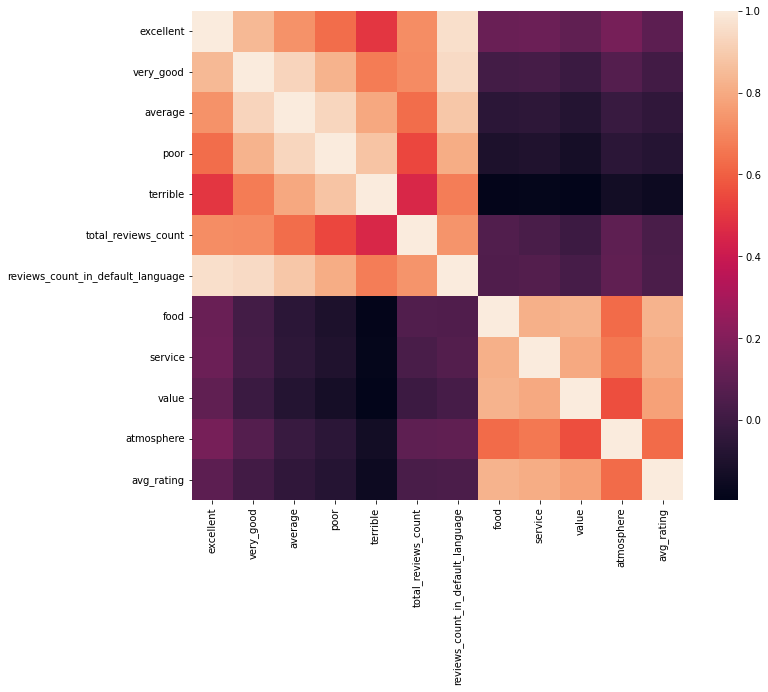

In [16]:
# Compute the correlation matrix
corr = df[review_columns + rating_columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr)

### Q2. Are vegetarian-friendly restaurants better than non-vegetarian ones?

#### Yes Vegeterian-Friendly are Better, By Comparing the Total Sum of the Attributes : ["excellent", "very_good", "average", "poor", "terrible","food", "service", "value", "atmosphere"] Between "vegetarian_friendly" = "Y" and "vegetarian_friendly" = "N"

In [17]:
# Define the attributes to compare
comparison_attributes = ["excellent", "very_good", "average", "poor", "terrible",
                         "food", "service", "value", "atmosphere"]

# Create a new dataframe containing only rows where vegetarian_friendly = Y
df_vegetarian_friendly_Y = df[df["vegetarian_friendly"] == 'Y']

# Create a new dataframe containing only rows where vegetarian_friendly = N
df_vegetarian_friendly_N = df[df["vegetarian_friendly"] == 'N']

# Get the sum of the specified attributes for the vegetarian_friendly = Y dataframe
veg_friendly_rest = df_vegetarian_friendly_Y[comparison_attributes].sum()

# Get the sum of the specified attributes for the vegetarian_friendly = Y dataframe
non_veg_rest = df_vegetarian_friendly_N[comparison_attributes].sum()

print("Total of the attributes where vegetarian_friendly = Y")
print(veg_friendly_rest)
print()
print("Total of the attributes where vegetarian_friendly = N")
print(non_veg_rest)

Total of the attributes where vegetarian_friendly = Y
excellent     18731715.0
very_good      7486019.0
average        2853030.0
poor           1620902.0
terrible       1786039.0
food           1315046.5
service        1303012.5
value          1271199.0
atmosphere      639866.0
dtype: float64

Total of the attributes where vegetarian_friendly = N
excellent     5630913.0
very_good     2880751.0
average       1207799.0
poor           706621.0
terrible      1133956.0
food          1144690.5
service       1154771.0
value         1129261.0
atmosphere     389913.0
dtype: float64


### Q3. Are there any significantly more expensive cuisines?

#### Yes, They are: Hungarian (Central European), Austrian, Italian, Japanes, and Chinese

In [18]:
# Create a new DataFrame containing only rows where the price_range column is not missing and contains the euro symbol
df2 = df[df['price_range'].notna() & df["price_range"].str.contains("€")]

In [19]:
# Create a new column that extracts only the digits and skips the € symbol
df2["price_to_am"] = df2["price_range"].replace({'[^\d-]+': ''}, regex=True)

C:\Users\isc\AppData\Local\Temp\ipykernel_15872\774529649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["price_to_am"] = df2["price_range"].replace({'[^\d-]+': ''}, regex=True)


In [20]:
# Splitting the new column into 2 columns: minimum range and maximum range
df2[['price_min', 'price_max']] = df2['price_to_am'].str.split("-", expand=True)

C:\Users\isc\AppData\Local\Temp\ipykernel_15872\151981961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['price_min', 'price_max']] = df2['price_to_am'].str.split("-", expand=True)
C:\Users\isc\AppData\Local\Temp\ipykernel_15872\151981961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['price_min', 'price_max']] = df2['price_to_am'].str.split("-", expand=True)


In [21]:
# Assign the columns into integer type
df2[['price_min', 'price_max']] = df2[['price_min', 'price_max']].astype(int) 

C:\Users\isc\AppData\Local\Temp\ipykernel_15872\2461854962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['price_min', 'price_max']] = df2[['price_min', 'price_max']].astype(int)


In [22]:
# Extracting the outliers

# Calculate the Z-scores of the numerical columns
z = np.abs(stats.zscore(df2[['price_min','price_max']]))

# Keep only the rows that have Z-scores less than 3
df2 = df2[(z < 3).all(axis=1)]

In [23]:
# Aggregating the mean price range for the cuisines
cuisines_comparison = df2.groupby("cuisines")["price_min","price_max"].mean()

C:\Users\isc\AppData\Local\Temp\ipykernel_15872\2106591817.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cuisines_comparison = df2.groupby("cuisines")["price_min","price_max"].mean()


In [24]:
# Show and sort the cuisines' average of min and max prices
cuisines_comparison.sort_values(["price_min","price_max"], ascending=False).head(10)

,price_min,price_max
cuisines,,
"European, Central European, Eastern European, Hungarian",5212.0,9100.0
"International, European, Hungarian, Bar, Contemporary, Pub",2639.0,9844.0
"Japanese, Austrian, European, Balti",1676.0,18645.0
"Italian, Chinese, Xinjiang",1666.0,41644.0
"Italian, Japanese, Fusion, Soups",1530.0,10340.0
"Mediterranean, Israeli, Arabic, Healthy, Middle Eastern",1500.0,6000.0
"Seafood, European, Greek, Grill",1258.0,6186.0
"European, Bar, Cafe, Pub, Central European, Hungarian",1229.0,3291.0
"Italian, Pizza, Seafood, Mediterranean, Spanish, European, Hungarian",1200.0,7000.0


# Business-specific

#### Q1. A gluten-free restaurant wants to open a new restaurant in a European capital where gluten-free restaurants are underrepresented. Assuming there are no other factors, except population and gluten-free restaurant density, what would be the top 5 capitals to open that restaurant?                                                                                                                                                              Ans: Madrid, Budapest, Paris, Berlin, Vienna

In [25]:
# Read the CSV file
eu_capitals = pd.read_csv("/Users/isc/Downloads/europe_capitals_population_and_area.csv")

# Reset the index of the DataFrame
eu_capitals.reset_index(inplace=True)

# Split the 'index' column into new columns
eu_capitals[["CityNo", "City", "Country", "Population", "Area in km2"]] = eu_capitals['index'].str.split(";", expand=True)

# Drop the 'index' column
eu_capitals.drop(columns=["index"], inplace = True)

# Rename the columns
eu_capitals.rename(columns={"CityNo;City;Country;Population;Area in km2 ":"Rest_No"}, inplace=True)

# Print the final DataFrame
eu_capitals

,Rest_No,CityNo,City,Country,Population,Area in km2
0,32.0,1,Amsterdam,Netherland,851573,219
1,NaN,2,Athens,Greece,664046,2929
2,4.0,4,Barcelona,Spain,1620809,101
3,7.0,4,Berlin,Germany,3711930,891
4,6.0,5,Bratislava,Slovakia,424428,367
5,38.0,6,Brussels,Belgium,1191604,161
6,2.0,7,Budapest,Hungary,1779361,525
7,25.0,8,Copenhagen,Denmark,602481,88
8,NaN,9,Dublin,Ireland,527612,115
9,NaN,10,Edinburgh,Scotland,482005,264


In [26]:
# Create a new DataFrame containing only rows where Rest_No is not missing
cleansed_capitals_df = eu_capitals.dropna(subset=["Rest_No"])

# Change the data type of "Rest_No" and "Population" columns to integer
cleansed_capitals_df[["Rest_No", "Population"]] = cleansed_capitals_df[["Rest_No", "Population"]].astype(int)

# Print the final DataFrame
cleansed_capitals_df

C:\Users\isc\AppData\Local\Temp\ipykernel_15872\3243049348.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleansed_capitals_df[["Rest_No", "Population"]] = cleansed_capitals_df[["Rest_No", "Population"]].astype(int)


,Rest_No,CityNo,City,Country,Population,Area in km2
0,32,1,Amsterdam,Netherland,851573,219
2,4,4,Barcelona,Spain,1620809,101
3,7,4,Berlin,Germany,3711930,891
4,6,5,Bratislava,Slovakia,424428,367
5,38,6,Brussels,Belgium,1191604,161
6,2,7,Budapest,Hungary,1779361,525
7,25,8,Copenhagen,Denmark,602481,88
10,92,11,Geneva,Switzerland,198979,15
12,5,13,Helsinki,Finland,631695,184
15,8,16,Ljubljana,Slovenia,279631,163


In [27]:
# Calculate and create a new column determines the density of the free-gluten resturants per 100,000 population
cleansed_capitals_df["gluten_free_density"] = cleansed_capitals_df["Rest_No"]/cleansed_capitals_df["Population"]*100000

# Print the final Data frame
cleansed_capitals_df

C:\Users\isc\AppData\Local\Temp\ipykernel_15872\1576897457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleansed_capitals_df["gluten_free_density"] = cleansed_capitals_df["Rest_No"]/cleansed_capitals_df["Population"]*100000


,Rest_No,CityNo,City,Country,Population,Area in km2,gluten_free_density
0,32,1,Amsterdam,Netherland,851573,219,3.757752
2,4,4,Barcelona,Spain,1620809,101,0.246790
3,7,4,Berlin,Germany,3711930,891,0.188581
4,6,5,Bratislava,Slovakia,424428,367,1.413667
5,38,6,Brussels,Belgium,1191604,161,3.188979
6,2,7,Budapest,Hungary,1779361,525,0.112400
7,25,8,Copenhagen,Denmark,602481,88,4.149508
10,92,11,Geneva,Switzerland,198979,15,46.236035
12,5,13,Helsinki,Finland,631695,184,0.791521
15,8,16,Ljubljana,Slovenia,279631,163,2.860913


In [28]:
# Sort the DataFrame by gluten_free_density in ascending order
cleansed_capitals_df.sort_values(by='gluten_free_density', ascending=True, inplace=True)

# Print the final data frame sorted
cleansed_capitals_df

C:\Users\isc\AppData\Local\Temp\ipykernel_15872\2074359051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleansed_capitals_df.sort_values(by='gluten_free_density', ascending=True, inplace=True)


,Rest_No,CityNo,City,Country,Population,Area in km2,gluten_free_density
19,3,20,Madrid,Spain,3141991,604,0.095481
6,2,7,Budapest,Hungary,1779361,525,0.112400
24,4,25,Paris,France,2206488,105,0.181284
3,7,4,Berlin,Germany,3711930,891,0.188581
2,4,4,Barcelona,Spain,1620809,101,0.246790
28,6,29,Vienna,Austria,1889083,414,0.317614
17,4,18,Luxembourg,Luxembourg,590667,2586,0.677201
12,5,13,Helsinki,Finland,631695,184,0.791521
4,6,5,Bratislava,Slovakia,424428,367,1.413667
15,8,16,Ljubljana,Slovenia,279631,163,2.860913


#### Q2. Think and propose a couple of other ways this dataset could be used to help businesses.

#### Ans: Targeting specific markets: Businesses can use the dataset to identify cities (although the count of free-gluten resturants in some capitals is unknown or missing)  with a high population, like London, Rome, and Warsaw.

#### Another approach:  Whether it's worth opening a gluten-free restaurant in a city with a high density of gluten-free restaurants depends on various factors. One potential benefit is that there is already a market for gluten-free food in that city, which could make it easier to attract customers. However, there may also be a lot of competition in that market, which could make it more challenging to differentiate your business and attract customers.It's important to consider other factors, such as the target market, location, and competition in the area, as well as the cost and availability of real estate, labor, and other resources to start a restaurant. Additionally, it could be beneficial to conduct more research on the specific city in question, including gathering information on the local economy, population demographics, and consumer preferences, in order to make a more informed decision.